# Проект: Аналитика крупного интернет-магазина

***Описание проекта***

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

***Описание данных***

Файл /datasets/hypothesis.csv.

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv.

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-тест.

**Цели исследования:**

* Приоритизация гипотез;
* Запуск А/В-теста;
* Анализ результатов А/В-теста.

**Приоритизация гипотез.**
    
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
    
Задача:
    
•	Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
•	Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
•	Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
    
**Анализ A/B-теста**
    
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
    
    
**Проанализируйте A/B-тест:**
    
* 1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* 2.Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* 3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* 4.Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
* 5.Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
* 6.Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* 7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* 8.Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* 9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* 10.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
* 11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* 12.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
* 13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* 14.Примите решение по результатам теста и объясните его. 

Варианты решений:

* 1. Остановить тест, зафиксировать победу одной из групп. 
* 2. Остановить тест, зафиксировать отсутствие различий между группами. 
* 3. Продолжить тест.

#### Шаг 1. Загрузка данных

***Импортируем библиотеки***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import numpy as np
import math
from scipy import stats as st
import scipy.stats as stats
from datetime import datetime, timedelta
from math import sqrt
from math import factorial
from scipy.stats import binom, norm
from matplotlib import rcParams, rcParamsDefault

import warnings
warnings.filterwarnings('ignore')

***Импортируем данные в датасет***

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/datasets/visitors.csv')

***Проверяем данные***

In [3]:
def inspect(df):
    pd.options.display.max_colwidth = 120
    display(df.head(10)) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df
hypothesis = inspect(hypothesis)
orders = inspect(orders)
visitors = inspect(visitors)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Количество дубликатов - 0


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Запустить акцию, дающую скидку на товар в день рождения                                 

**************************************************


3     3
8     2
1     1
2     1
5     1
10    1
Name: reach, dtype: int64

**************************************************


3     3
1     1
2     1
5     1
7     1
9     1
10    1
Name: impact, dtype: int64

**************************************************


8    3
1    1
2    1
3    1
4    1
7    1
9    1
Name: confidence, dtype: int64

**************************************************


3     3
5     2
1     1
6     1
8     1
10    1
Name: efforts, dtype: int64

**************************************************


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество дубликатов - 0


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


1658608862    1
2211880073    1
3913205113    1
437656952     1
3592105335    1
             ..
2872509092    1
2013919907    1
3154167297    1
2960804513    1
4281129020    1
Name: transactionid, Length: 1197, dtype: int64

**************************************************


4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitorid, Length: 1031, dtype: int64

**************************************************


2019-08-05    48
2019-08-12    47
2019-08-14    47
2019-08-15    46
2019-08-06    46
2019-08-28    45
2019-08-01    45
2019-08-02    44
2019-08-27    44
2019-08-08    43
2019-08-19    43
2019-08-07    42
2019-08-29    42
2019-08-22    41
2019-08-09    41
2019-08-26    41
2019-08-03    40
2019-08-23    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-13    35
2019-08-30    35
2019-08-04    33
2019-08-31    32
2019-08-20    32
2019-08-24    31
2019-08-18    26
2019-08-11    26
2019-08-17    24
2019-08-25    24
Name: date, dtype: int64

**************************************************


B    640
A    557
Name: group, dtype: int64

**************************************************


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дубликатов - 0


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


2019-08-11    2
2019-08-17    2
2019-08-02    2
2019-08-13    2
2019-08-07    2
2019-08-12    2
2019-08-29    2
2019-08-14    2
2019-08-09    2
2019-08-15    2
2019-08-04    2
2019-08-25    2
2019-08-06    2
2019-08-28    2
2019-08-22    2
2019-08-21    2
2019-08-20    2
2019-08-24    2
2019-08-10    2
2019-08-03    2
2019-08-18    2
2019-08-23    2
2019-08-01    2
2019-08-26    2
2019-08-31    2
2019-08-30    2
2019-08-27    2
2019-08-16    2
2019-08-08    2
2019-08-05    2
2019-08-19    2
Name: date, dtype: int64

**************************************************


B    31
A    31
Name: group, dtype: int64

**************************************************


***Для наглядности построим гистограммы по данным датафреймов***

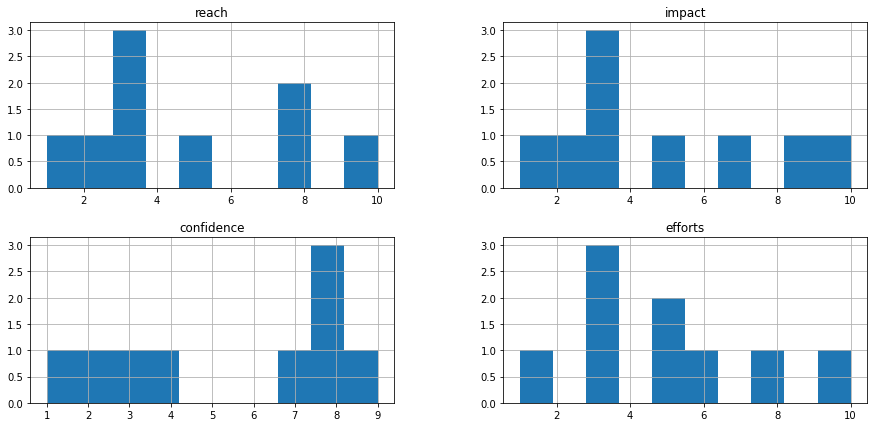

In [4]:
hypothesis.hist(figsize=(15, 7));

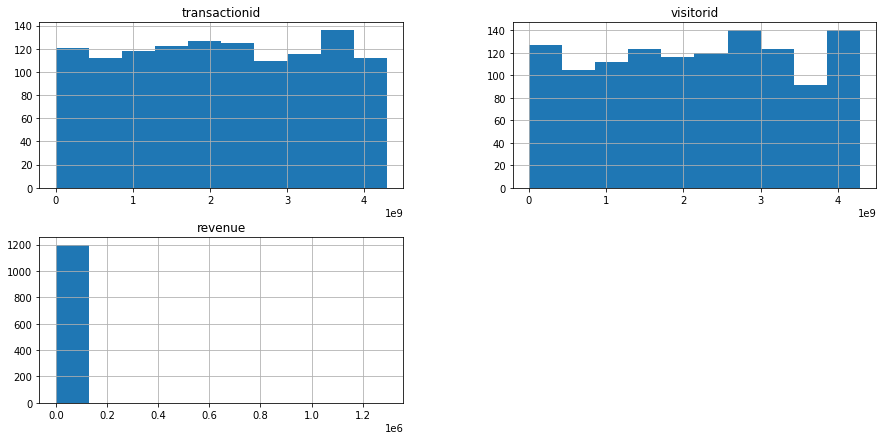

In [5]:
orders.hist(figsize=(15, 7));

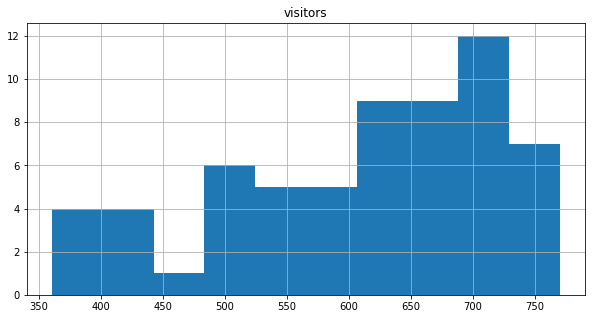

In [6]:
visitors.hist(figsize=(10, 5));

**Вывод:**

В датафрейме hypothesis присутствует 5 столбцов, он состоит из 9 строк. Вес 488.0+ bytes. Пропуски и дубликаты отсутствуют. 

В датафрейме orders присутствует 7 столбцов, он состоит из 1197 строк. Вес 65.6+ KB. Пропуски и дубликаты отсутствуют.

В датафрейме visitors присутствует 5 столбцов, он состоит из 62 строк. Вес 2.5+ KB. Пропуски и дубликаты отсутствуют.

Названия столбцов в датафрейме hypothesis нужно привести к стандартному стилю. Названия столбцов transactionId и visitorId  в датафрейме orders необходимо будет привести к стандартному 'змеиному' формату.

Формат даты и времени в orders и visitors нужно будет привести к удобному виду и создать отдельно колонки с месяцем и годом.
Также, нужно будет проверить, за какой период предоставлены данные в этих двух датафреймах.

#### Шаг 2. Предобработка данных

***Изменим настройки отображения***

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

***Приведём формат даты и времени датафрейма orders к удобному виду и создадим отдельно колонки с месяцем и годом***

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
orders['month']= pd.to_datetime(orders['date']).dt.strftime('%Y-%m')
orders['year'] = pd.to_datetime(orders['date']).dt.strftime('%Y')

***Приведём формат даты и времени датафрейма visitors к удобному виду и создадим отдельно колонки с месяцем и годом***

In [9]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors['month']= pd.to_datetime(visitors['date']).dt.strftime('%Y-%m')
visitors['year'] = pd.to_datetime(visitors['date']).dt.strftime('%Y')

***Приведём названия столбцов в датафрейме hypothesis к стандартному стилю***

In [10]:
hypothesis.columns = [x.lower() for x in hypothesis.columns.values]

In [11]:
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


***Приводим названия столбцов в датафрейме orders к к стандартному 'змеиному' формату***

In [12]:
orders.rename(columns = {'transactionid':'transaction_id', 'visitorid':'visitor_id'}, inplace = True )

In [13]:
orders.head()

,transaction_id,visitor_id,date,revenue,group,month,year
0,3667963787,3312258926,2019-08-15,1650,B,2019-08,2019
1,2804400009,3642806036,2019-08-15,730,B,2019-08,2019
2,2961555356,4069496402,2019-08-15,400,A,2019-08,2019
3,3797467345,1196621759,2019-08-15,9759,B,2019-08,2019
4,2282983706,2322279887,2019-08-15,2308,B,2019-08,2019


***Проверим, за какой период предоставлены данные***

In [14]:
orders['date'].dt.year.unique()

array([2019])

In [15]:
visitors['date'].dt.year.unique()

array([2019])

Данные в orders и visitors предоставлены только за 2019 год.

***Проверим минимальные и максимальные даты теста***

In [16]:
print(min(visitors['date']))
print(max(visitors['date']))

2019-08-01 00:00:00
2019-08-31 00:00:00


Исходя из данных обоих групп, мы имеем данные за август 2019.

**Вывод:**

Пропущенных данных и дубликатов в датафреймах нет.

Изменим настройки отображения числовых показателей до двух знаков после запятой.

Добавили столбец month и year в датафреймы с датами.

Привели к стандарному стилю столбцы датафреймах hypothesis и orders.

Данные в orders и visitors предоставлены только за август 2019.

#### Шаг 3. Исследовательский анализ данных

***Посмотрим выборку по группам***

In [17]:
ab_test = orders.groupby('visitor_id').agg({'group': ['nunique', 'unique']})
ab_test.columns = ['groups', 'group_by_test']
ab_test = ab_test.query('groups > 1')
display(ab_test.head(10))
ab_test_A=503/1031*100
ab_test_B=586/1031*100
print('Общее количество пользователей:', orders['visitor_id'].nunique())
print('Кол-во пользователей в группе А:', orders.query('group == "A"')['visitor_id'].nunique())
print(f'% от общего кол-ва пользователей в группе А: {ab_test_A:,.2f}%')
print('Кол-во пользователей в группе В:', orders.query('group == "B"')['visitor_id'].nunique())
print(f'% от общего кол-ва пользователей в группе B: {ab_test_B:,.2f}%')
print('Кол-во пользователей в обоих группах:',len(ab_test))

,groups,group_by_test
visitor_id,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"
351125977,2,"[B, A]"
393266494,2,"[A, B]"
457167155,2,"[B, A]"
471551937,2,"[A, B]"


Общее количество пользователей: 1031
Кол-во пользователей в группе А: 503
% от общего кол-ва пользователей в группе А: 48.79%
Кол-во пользователей в группе В: 586
% от общего кол-ва пользователей в группе B: 56.84%
Кол-во пользователей в обоих группах: 58


**Вывод:**

Здесь видно, что 58 пользователей находятся как в группе А, так и в группе В. 

В процентном соотношении это получается, что в группе А они составляют 11,53%, в группе В - 9,89%. А от общего количества пользователей они составляют около 5,60%. Так как они принимают участие в обоих группах, есть, конечно, вероятность "подглядывания", но, я считаю, что не стоит исключать данных пользователей из теста и предлагаю их оставить. Врядли они внесут большую погрешность в исследование.

***Приоритизация гипотез***

**Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [18]:
hypothesis['ICE'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)

In [19]:
pd.set_option('max_colwidth', 120)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:**

Самой первой для проверки идет гипотеза под номером восемь - Запустить акцию, дающую скидку на товар в день рождения.

**Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [20]:
hypothesis['RICE'] = ((hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'])

In [21]:
pd.set_option('max_colwidth', 120)
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


**Вывод:**

Здесь, самой первой для проверки идет гипотеза под номером семь - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Поскольку на значимость гипотезы влияет охват пользователей Reach, а он у этой гипотезы ровняется 10, то она и будет в приоритете.

#### Шаг 4. Проанализируйте A/B-тест

***Постройте график кумулятивной выручки по группам.***

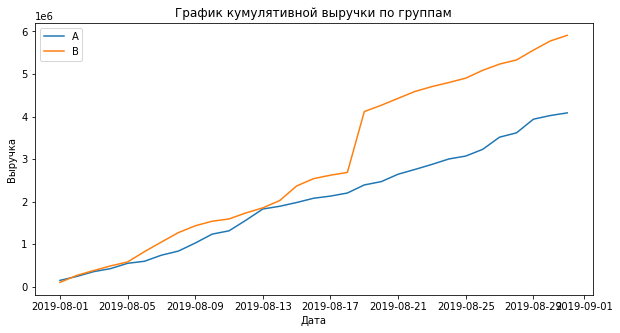

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'transaction_id' : 'nunique', 
            'visitor_id' : 'nunique', 
            'revenue' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'visitors' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# настраиваем размер графика
plt.figure(figsize=(10, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show();

**Вывод**

Выручка почти равномерно увеличивается в течение всего теста. Но, видно что выручка у группы В выше выручки группы А. Также заметно, что на отметке около 19 августа выручка группы В резко отскочила вверх.

Это может говорить о всплесках числа заказов, либо о появлении очень дорогих заказов.

***Постройте график кумулятивного среднего чека по группам.***

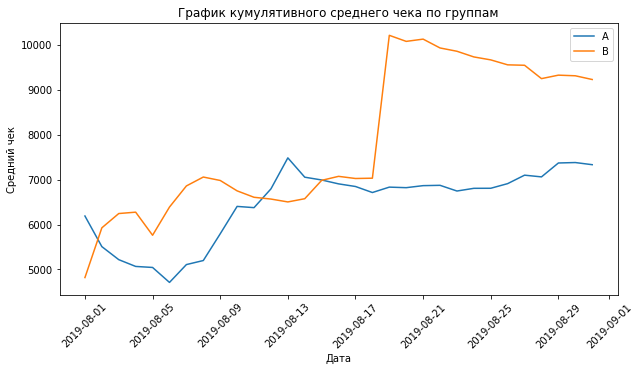

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

**Вывод**

Кумулятивный средний чек группы В практически на всем протяжении превышал средний чек группы А. Также, можно видеть что в районе 18 августа резкое движение чека группы В вверх. Теоретически, это как раз подтверждает наличие крупного заказа в тот день. К концу графика, средний чек по обоим группам начинает немного стабилизироваться.

***Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.***

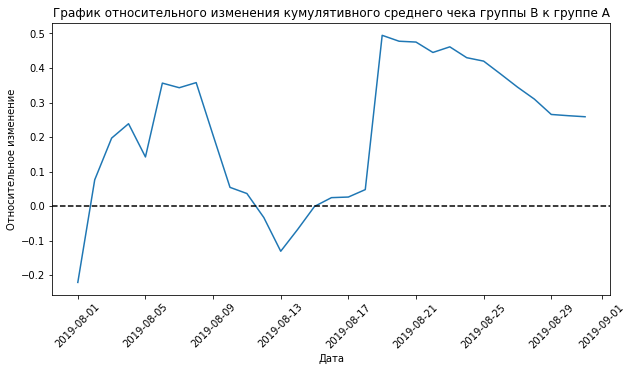

In [24]:
plt.figure(figsize=(10, 5))
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']
                                           /mergedCumulativeRevenue['ordersB'])/ 
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']) - 1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation = 45)
plt.show()

**Вывод**

Относительное изменение кумулятивного среднего чека группы B к группе A было положительным практически во все время исследования. Сильные отрицательные значения наблюдаются только в районе 13 августа.
В некоторых местах на графике виден резкий скачок вверх - это может говорить нам о наличии крупных заказов.

***Постройте график кумулятивного среднего количества заказов на посетителя по группам.***

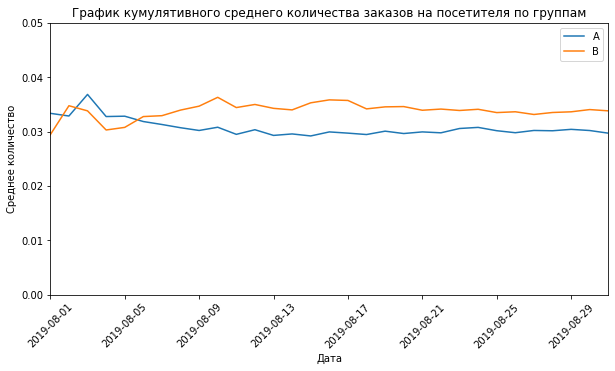

In [25]:
# настраиваем размер графика
plt.figure(figsize=(10, 5))

# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([pd.datetime(2019, 8, 1), pd.datetime(2019, 8, 31), 0, 0.05])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество')
plt.xticks(rotation = 45)
plt.legend();

**Вывод**

Среднее количество заказов сначала увеличивалось для обеих групп. Далее, количество сокращается для группы А и стабилизируется на определенном диапазоне. В конце, есть некоторый спад. У группы В наоборот, идет восстановление количества заказов (либо качества). Выходя на определенный диапазон, количество заказов по продолжению теста начинает понемногу идти на спад. В конце есть небольшой выход вверх и далее небольшое падение.

***Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.***

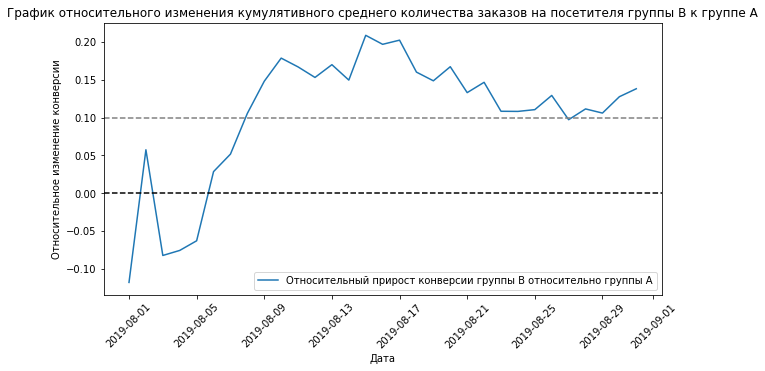

In [26]:
mergedCumulativeConversions = ( cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
                              )
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], 
        mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
        label='Относительный прирост конверсии группы B относительно группы A')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y = 0.1, color='grey', linestyle='--');
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение конверсии')
plt.xticks(rotation = 45)
plt.show();

**Вывод**

На графике можно наблюдать резкий выброс ко 2 августу, потом идет спад и выход вверх.
В целом, конверсия группы В выше группы А и преимущественно продолжает колебаться в районе 10-14%.

***Постройте точечный график количества заказов по пользователям.***

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


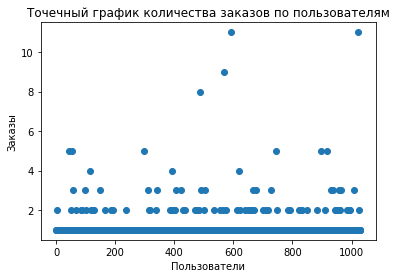

In [27]:
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.show()

**Вывод**

Здесь можно наблюдать, что основное количество пользователей делает 1-2 заказа. Но есть значительная часть пользователей, которые делают 3, 4 и даже 5 заказов. Учитывать ли эти заказы как аномальные пока мы не можем, так как их точная доля не ясна.

Есть и совсем выбивающиеся количества заказов - от 8 до 12. Видно, что их доля небольшая. Эти заказы, скорее всего, были сделаны на большие суммы. Т.е. покупали большими партиями, или в заказах было что-то дорогое по стоимости.

***Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.***

In [28]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Вывод**

Не более 5% пользователей оформляли больше 2 заказов. 1% пользователей оформляли более 4 заказов. Думаю, что нужно выбрать 2 заказа на пользователя как нижнюю границу, остальные будем считать аномалиями.

***Постройте точечный график стоимостей заказов.***

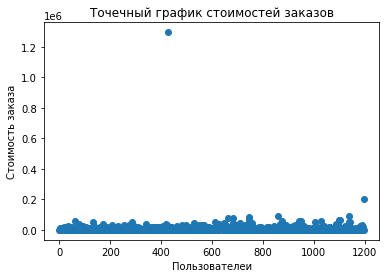

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователеи')
plt.ylabel('Стоимость заказа');

**Вывод**

На графике видно, что большинство заказов не превышает 100 тысяч рублей. И можно наблюдать 1 заказ больше 1.2 млн. Могу допустить, что это тот выброс в группе В.

***Посчитайте 95-й и 99-й перцентили стоимости заказов.***

In [30]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Вывод**

Не более 5% заказов имеют стоимость 28000 рублей. Также, не более 1% дороже 58233.2 рублей. Предполагаю, что можно выбрать стоимость заказа в 28000 рублей как нижнюю границу и отсеять аномальные величины по ней.

***Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.***

Сформулируем гипотезы:

Н0: Различий в среднем количестве заказов между группами нет.

Н1: Различия в среднем количестве заказов между группами есть.

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']  
    
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print()

alpha = 0.05
results=st.mannwhitneyu(sampleA, sampleB)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Различий в среднем количестве заказов между группами нет.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Различия в среднем количестве заказов между группами есть.')


print('P-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост среднего группы В к конверсии группы А: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              20   
1 2019-08-02              20            93822              23   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              16   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  20               101217               719   
1                  43               266748               619   
2                  59               38

**Вывод**

P-value = 0.017, что меньше 0.05. 

Это значит, что по «сырым» данным в среднем количестве заказов есть статистически значимые различия между группой A и B. Относительный прирост среднего группы В к конверсии группы А равен 13,8%.

***Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.***

Сформулируем гипотезу:

Н0: Различий в среднем чеке между группами нет.

Н1: Различия в среднем чеке между группами есть.

In [32]:
alpha = 0.05
results=st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Различий в среднем чеке между группами нет.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Различия в среднем чеке между группами есть.')
    
print('P-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительное различие среднего чека между группами по «сырым» данным: {0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

Не получилось отвергнуть нулевую гипотезу: Различия в среднем чеке между группами есть.
P-value = 0.729
Относительное различие среднего чека между группами по «сырым» данным: 0.259


**Вывод**

P-value больше 0.05. Таким образом, статистически значимых отличий в среднем чеке между группами нет. Но, относительное различие среднего чека между группами по «сырым» данным - 25,9 %. Могу предположить, что это из-за аномальных по сумме заказов.

***Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.***

Сформулируем гипотезу:

Н0: Различий в конверсии между группами нет.

Н1: Различия в конверсии между группами есть.

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id']
    ],
    axis = 0
)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head())
print(len(abnormalUsers))

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print()

alpha = 0.05
results=st.mannwhitneyu(sampleA, sampleB)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Различий в конверсии между группами нет.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Различия в конверсии между группами есть.')

print('P-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Различия в конверсии групп A и B:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
74

Отвергаем нулевую гипотезу: Различий в конверсии между группами нет.
P-value = 0.013
Различия в конверсии групп A и B: 0.173


**Вывод**

74 аномальных пользователей.

P-value = 0.013, это меньше 0.05.

Таким образом, по «очищенным» данным различия в конверсии групп A и B есть. Группа B выглядит значительно лучше группы A на 17,3%. Это выше чем с «сырыми» данными, где результат был 13.8%.

***Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.***

In [34]:
alpha = 0.05
results=st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Различий в среднем чеке между группами нет.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Различия в среднем чеке между группами есть.')

print('P-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'],orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'],)[1]))

print('Относительное изменение среднего чека в группе B по отношению к группе A после очистки данных:', '{0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'].mean()- 1))

Не получилось отвергнуть нулевую гипотезу: Различия в среднем чеке между группами есть.
P-value = 0.738
Относительное изменение среднего чека в группе B по отношению к группе A после очистки данных: -0.020


P-value = 0.738, что значительно больше 0.05.

Нет статистически значимого различия по среднему чеку между группами по «сырым» и по «очищенным» данным.

Относительное изменение среднего чека в группе B по отношению к группе A после очистки данных -2%

#### Шаг 5. Результаты теста

Тест можно остановить и и по итогу признать его успешным.

Можно зафиксировать победу группы В, так как группа В лучше группы А по конверсии, хотя по среднему чеку группы примерно равны.
Также, кумулятивная выручка группы В стабильно выше выручки группы А.

#### Шаг 6. Общий вывод

В ходе проведенного анализа данных была проделана работа по приоритизации гипотез.
Был применен фреймворк ICE, где наиболее перспективной оказалась гипотеза под номером восемь - Запустить акцию, дающую скидку на товар в день рождения. При применении фреймворка RICE, наиболее перспективной оказалась гипотеза под номером семь - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Поскольку на значимость гипотезы влияет охват пользователей Reach, а он у этой гипотезы ровняется 10, то она и стала приоритетной для проработки.

После чего был проанализирован A/B-тест и выявлено следующее:

* На графике кумулятивной выручки по группам, выручка почти равномерно увеличивается в течение всего теста. Но, видно что выручка у группы В выше выручки группы А.
* На графике кумулятивного среднего чека по группам, кумулятивный средний чек группы В практически на всем протяжении превышал средний чек группы А. Также, можно видеть что в районе 18 августа резкое движение чека группы В вверх. Теоретически, это как раз подтверждает наличие крупного заказа в тот день. К концу графика, средний чек по обоим группам начинает немного стабилизироваться.
* На графике относительного изменения кумулятивного среднего чека группы B к группе A, относительное изменение кумулятивного среднего чека группы B к группе A было положительным практически во все время исследования. Сильные отрицательные значения наблюдаются только в районе 13 августа. В некоторых местах на графике виден резкий скачок вверх - это может говорить нам о наличии крупных заказов.
* На графике кумулятивного среднего количества заказов на посетителя по группам, среднее количество заказов сначала увеличивалось для обеих групп. Далее, количество сокращается для группы А и стабилизируется на определенном диапазоне. В конце, есть некоторый спад. У группы В наоборот, идет восстановление количества заказов (либо качества). Выходя на определенный диапазон, количество заказов по продолжению теста начинает понемногу идти на спад. В конце, есть небольшой выход вверх и далее небольшое падение.
* На графике относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A можно наблюдать резкий выброс ко 2 августу, потом идет спад и выход вверх. В целом, конверсия группы В выше группы А и преимущественно продолжает колебаться в районе 10-14%.
* На точечном графике количества заказов по пользователям можно наблюдать, что основное количество пользователей делает 1-2 заказа. Но есть значительная часть пользователей, которые делают 3, 4 и даже 5 заказов. Есть и совсем выбивающиеся количества заказов - от 8 до 12. Видно, что их доля небольшая. Эти заказы, скорее всего, были сделаны на большие суммы. Т.е. покупали большими партиями, или в заказах было что-то дорогое по стоимости.
* Не более 5% пользователей оформляли больше 2 заказов. 1% пользователей оформляли более 4 заказов. Выбрали 2 заказа на пользователя как нижнюю границу, остальные будем считать аномалиями.
* Не более 5% заказов имеют стоимость 28000 рублей. Также, не более 1% дороже 58233.2 рублей. Выбрали стоимость заказа в 28000 рублей как нижнюю границу и предложили отсеять аномальные величины по ней.
* По «сырым» данным в среднем количестве заказов есть статистически значимые различия между группой A и B. Относительный прирост среднего группы В к конверсии группы А равен 13,8%.
* Статистически значимых отличий в среднем чеке между группами нет. Но, относительное различие среднего чека между группами по «сырым» данным - 25,9 %. Предположительно это из-за аномальных по сумме заказов.
* По «очищенным» данным различия в конверсии групп A и B есть. Группа B выглядит значительно лучше группы A на 17,3%. Это выше чем с «сырыми» данными, где результат был 13.8%.
* Нет статистически значимого различия по среднему чеку между группами по «сырым» и по «очищенным» данным. Относительное изменение среднего чека в группе B по отношению к группе A после очистки данных -2%.